# Combined labels for both cells and nuclei for breast_s0
# Version with late fusion PCA

In [1]:
slide_id = "breast_s0"

In [2]:
import pandas as pd
import scanpy as sc
import spatialdata as sd
import numpy as np
import anndata as ad
from spatialdata.models import get_table_keys
from matplotlib.colors import to_rgba
from functools import partial
from matplotlib import colors
import gc

## 1. Load the data

In [3]:
sdata_final = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('tables',))

cellid2transcript_cat = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'transcript_cat']].values)

cellid2nucleilabel = dict(sdata_final.tables['table_nuclei'].obs[['cell_id', 'final_label']].values)
cellid2celllabel = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'final_label']].values)

cellid2nucleilabel1 = dict(sdata_final.tables['table_nuclei'].obs[['cell_id', 'label1']].values)
cellid2celllabel1 = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'label1']].values)

del sdata_final
gc.collect()

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


1510

In [4]:
sdata_processed = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_processed/sdata_{slide_id}.zarr", selection=('tables',))
sdata_processed

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


SpatialData object, with associated Zarr store: /Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_processed/sdata_breast_s0.zarr
└── Tables
      ├── 'table_cells': AnnData (576963, 380)
      └── 'table_nuclei': AnnData (576963, 541)
with coordinate systems:

with the following elements in the Zarr store but not in the SpatialData object:
    ▸ nucleus_boundaries (Shapes)
    ▸ he (Images)
    ▸ st (Points)
    ▸ morpho (Images)
    ▸ cell_boundaries (Shapes)

In [5]:
adata_nuclei_ini = sdata_processed.tables['table_nuclei'].copy()
adata_nuclei_ini

AnnData object with n_obs × n_vars = 576963 × 541
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram'
    uns: 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'spatial', 'tangram_pred'

In [6]:
adata_nuclei_ini.var

Empty DataFrame
Columns: []
Index: [ABCC11, ACKR1, ACTA2, ACTG2, ADAM9, ADGRE5, ADGRL4, ADH1B, ADIPOQ, AEBP1, AGR3, AIF1, AKR1C1, AKR1C3, ALDH1A3, ANGPT2, ANKRD28, ANKRD29, ANKRD30A, APC, APOBEC3A, APOBEC3B, APOC1, AQP1, AQP3, AR, ARSG, AVPR1A, BAALC, BACE2, BANK1, BASP1, BIRC3, BLANK_0006, BLANK_0011, BLANK_0013, BLANK_0027, BLANK_0030, BLANK_0037, BLANK_0055, BLANK_0069, BLANK_0072, BLANK_0075, BLANK_0087, BLANK_0097, BLANK_0110, BLANK_0114, BLANK_0119, BLANK_0120, BLANK_0122, BLANK_0128, BLANK_0130, BLANK_0146, BLANK_0147, BLANK_0163, BLANK_0165, BLANK_0180, BLANK_0181, BLANK_0186, BLANK_0189, BLANK_0212, BLANK_0218, BLANK_0221, BLANK_0223, BLANK_0230, BLANK_0231, BLANK_0237, BLANK_0250, BLANK_0253, BLANK_0272, BLANK_0273, BLANK_0278, BLANK_0287, BLANK_0294, BLANK_0298, BLANK_0303, BLANK_0310, BLANK_0311, BLANK_0318, BLANK_0319, BLANK_0321, BLANK_0337, BLANK_0344, BLANK_0351, BLANK_0352, BLANK_0353, BLANK_0354, BLANK_0356, BLANK_0359, BLANK_0361, BLANK_0362, BLANK_0364, BLANK_0365, BLANK_0366, BLANK_0368, BLANK_0371, BLANK_0372, BLANK_0373, BLANK_0378, BLANK_0379, ...]

[541 rows x 0 columns]

In [7]:
adata_cells_ini = sdata_processed.tables['table_cells'].copy()
adata_cells_ini

AnnData object with n_obs × n_vars = 576963 × 380
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [8]:
adata_cells_ini.var

gene_ids    feature_types   genome
ABCC11  ENSG00000121270  Gene Expression  Unknown
ACKR1   ENSG00000213088  Gene Expression  Unknown
ACTA2   ENSG00000107796  Gene Expression  Unknown
ACTG2   ENSG00000163017  Gene Expression  Unknown
ADAM9   ENSG00000168615  Gene Expression  Unknown
...                 ...              ...      ...
WARS    ENSG00000140105  Gene Expression  Unknown
XCR1    ENSG00000173578  Gene Expression  Unknown
ZEB1    ENSG00000148516  Gene Expression  Unknown
ZEB2    ENSG00000169554  Gene Expression  Unknown
ZNF562  ENSG00000171466  Gene Expression  Unknown

[380 rows x 3 columns]

In [9]:
# Clean memory
del sdata_processed
gc.collect()

424

## 2. Get adata_nuclei and adata_cyto

In [10]:
adata_cells_ini = adata_cells_ini[adata_cells_ini.obs["transcript_counts"]>10].copy()  # Filter cells with less than 10 transcripts
len(adata_cells_ini.obs)

574869

In [11]:
# Align the cell_id in both AnnData objects
# Create a mapping of cell_id to index position in both objects
nuclei_idx = adata_nuclei_ini.obs.set_index('cell_id').index
cells_idx = adata_cells_ini.obs.set_index('cell_id').index

# Find the intersection of cell_id in both datasets
common_cells = nuclei_idx.intersection(cells_idx)
print(f"Number of common cell_ids: {len(common_cells)}")

# Subset both AnnData objects to include only common cell_ids
adata_nuclei = adata_nuclei_ini[adata_nuclei_ini.obs['cell_id'].isin(common_cells)]
adata_cells = adata_cells_ini[adata_cells_ini.obs['cell_id'].isin(common_cells)]

# Merge the 'obs' dataframes based on 'cell_id' to ensure the same order in both
obs_nuclei = adata_nuclei.obs[['cell_id']].reset_index(drop=True)
obs_cells = adata_cells.obs[['cell_id']].reset_index(drop=True)

# Ensure that both are in the same order
adata_nuclei = adata_nuclei[obs_nuclei['cell_id'].argsort().values]
adata_cells = adata_cells[obs_cells['cell_id'].argsort().values]

# Check that the cell_ids match now
assert np.array_equal(adata_nuclei.obs['cell_id'].values, adata_cells.obs['cell_id'].values), "Cell IDs do not match after alignment."

# Find common genes
common_genes = adata_nuclei.var_names.intersection(adata_cells.var_names)
print(f"Number of common genes: {len(common_genes)}")

# Subset both AnnData objects to include only the common genes
adata_nuclei = adata_nuclei[:, common_genes]
adata_cells = adata_cells[:, common_genes]

# Remove nucleus RNA from cell RNA to get the cytoplasmic RNA
X_cyto = adata_cells.X - adata_nuclei.X

# Because of slight mismatches or rounding, some entries might go negative by 1 or 2 in real data. So we clip to 0:
X_cyto.data = np.clip(X_cyto.data, a_min=0, a_max=None)

# Create a new AnnData object with the cytoplasmic RNA
adata_cyto = ad.AnnData(
    X=X_cyto,
    obs=adata_cells.obs.copy(),  # or adata_nuclei.obs, they should be the same set
    var=adata_cells.var.copy()   # same genes as well
)

Number of common cell_ids: 574869
Number of common genes: 380


In [12]:
adata_nuclei.obs["transcript_counts"] = adata_nuclei.X.sum(axis=1)
adata_nuclei.obs

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_45745/547616959.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_nuclei.obs["transcript_counts"] = adata_nuclei.X.sum(axis=1)


region   slide     cell_id       area  \
aaaaaaaa-1  nucleus_boundaries  morpho  aaaaaaaa-1  39.195546   
aaaaaaab-1  nucleus_boundaries  morpho  aaaaaaab-1  35.628433   
aaaaaaac-1  nucleus_boundaries  morpho  aaaaaaac-1  27.475306   
aaaaaaad-1  nucleus_boundaries  morpho  aaaaaaad-1  20.115325   
aaaaaaae-1  nucleus_boundaries  morpho  aaaaaaae-1  41.472044   
...                        ...     ...         ...        ...   
aaaimnlo-1  nucleus_boundaries  morpho  aaaimnlo-1  30.208380   
aaaimnlp-1  nucleus_boundaries  morpho  aaaimnlp-1  31.361348   
aaaimnma-1  nucleus_boundaries  morpho  aaaimnma-1  55.811864   
aaaimnmb-1  nucleus_boundaries  morpho  aaaimnmb-1  12.621063   
aaaimnmc-1  nucleus_boundaries  morpho  aaaimnmc-1   8.602764   

                                    ct_tangram  transcript_counts  
aaaaaaaa-1                           Mast cell                 13  
aaaaaaab-1                                 ILC                 25  
aaaaaaac-1                    CXCL+ fibroblast                 73  
aaaaaaad-1           CXCL14 mammary basal cell                 50  
aaaaaaae-1                        Capillary EC                143  
...                                        ...                ...  
aaaimnlo-1         Vascular smooth muscle cell                 75  
aaaimnlp-1  Secretoglobin mammary luminal cell                 87  
aaaimnma-1      SFN mammary luminal progenitor                158  
aaaimnmb-1                           Mast cell                 28  
aaaimnmc-1         Vascular smooth muscle cell                 15  

[574869 rows x 6 columns]

In [13]:
adata_cyto.obs["transcript_counts"] = adata_cyto.X.sum(axis=1).astype(int)
adata_cyto.obs

cell_id  transcript_counts  control_probe_counts  \
0       aaaaaaaa-1                 45                     0   
1       aaaaaaab-1                 66                     0   
2       aaaaaaac-1                122                     0   
3       aaaaaaad-1                100                     0   
4       aaaaaaae-1                 77                     0   
...            ...                ...                   ...   
576958  aaaimnlo-1                 28                     0   
576959  aaaimnlp-1                 24                     0   
576960  aaaimnma-1                 48                     0   
576961  aaaimnmb-1                 27                     0   
576962  aaaimnmc-1                  1                     0   

        control_codeword_counts  unassigned_codeword_counts  total_counts  \
0                             0                           0            57   
1                             0                           0            88   
2                             0                           0           190   
3                             0                           0           146   
4                             0                           0           203   
...                         ...                         ...           ...   
576958                        0                           0            90   
576959                        0                           0            96   
576960                        0                           0           178   
576961                        0                           0            50   
576962                        0                           0            12   

         cell_area  nucleus_area       region  
0       277.936719     29.216094  cell_labels  
1       687.955469     37.840938  cell_labels  
2       223.342813     29.216094  cell_labels  
3        96.995625     21.900781  cell_labels  
4       115.012969     44.162813  cell_labels  
...            ...           ...          ...  
576958   50.981406     31.654531  cell_labels  
576959   47.007656     32.106094  cell_labels  
576960   90.222188     59.741719  cell_labels  
576961   83.584219     13.953281  cell_labels  
576962   12.147031      9.663438  cell_labels  

[574869 rows x 9 columns]

In [14]:
adata_cells_ini.obs

cell_id  transcript_counts  control_probe_counts  \
0       aaaaaaaa-1                 57                     0   
1       aaaaaaab-1                 88                     0   
2       aaaaaaac-1                190                     0   
3       aaaaaaad-1                146                     0   
4       aaaaaaae-1                203                     0   
...            ...                ...                   ...   
576958  aaaimnlo-1                 90                     0   
576959  aaaimnlp-1                 96                     0   
576960  aaaimnma-1                178                     0   
576961  aaaimnmb-1                 50                     0   
576962  aaaimnmc-1                 12                     0   

        control_codeword_counts  unassigned_codeword_counts  total_counts  \
0                             0                           0            57   
1                             0                           0            88   
2                             0                           0           190   
3                             0                           0           146   
4                             0                           0           203   
...                         ...                         ...           ...   
576958                        0                           0            90   
576959                        0                           0            96   
576960                        0                           0           178   
576961                        0                           0            50   
576962                        0                           0            12   

         cell_area  nucleus_area       region  
0       277.936719     29.216094  cell_labels  
1       687.955469     37.840938  cell_labels  
2       223.342813     29.216094  cell_labels  
3        96.995625     21.900781  cell_labels  
4       115.012969     44.162813  cell_labels  
...            ...           ...          ...  
576958   50.981406     31.654531  cell_labels  
576959   47.007656     32.106094  cell_labels  
576960   90.222188     59.741719  cell_labels  
576961   83.584219     13.953281  cell_labels  
576962   12.147031      9.663438  cell_labels  

[574869 rows x 9 columns]

In [15]:
adata_nuclei.var

Empty DataFrame
Columns: []
Index: [ABCC11, ACKR1, ACTA2, ACTG2, ADAM9, ADGRE5, ADGRL4, ADH1B, ADIPOQ, AEBP1, AGR3, AIF1, AKR1C1, AKR1C3, ALDH1A3, ANGPT2, ANKRD28, ANKRD29, ANKRD30A, APC, APOBEC3A, APOBEC3B, APOC1, AQP1, AQP3, AR, ARSG, AVPR1A, BAALC, BACE2, BANK1, BASP1, BIRC3, BUB1, C11orf96, C15orf48, C1QA, C1QC, C2orf42, C5orf46, C6orf132, CACNG4, CAPN9, CAV1, CAVIN2, CCDC6, CCDC80, CCL18, CCL19, CCL26, CCL5, CCL8, CCND1, CCPG1, CCR7, CD14, CD163, CD19, CD247, CD27, CD274, CD36, CD3E, CD3G, CD4, CD40, CD52, CD68, CD69, CD79A, CD79B, CD80, CD83, CD86, CD8A, CD9, CD93, CD96, CDC42EP1, CDH1, CEACAM6, CEACAM8, CEBPB, CEL, CENPF, CILP, CLEC14A, CLEC9A, CLECL1, CLIC6, CPA3, CRISPLD2, CST1, CTH, CTHRC1, CTLA4, CTSG, CTTN, CX3CR1, CXCL12, ...]

[380 rows x 0 columns]

In [16]:
adata_cyto.var

gene_ids    feature_types   genome
ABCC11  ENSG00000121270  Gene Expression  Unknown
ACKR1   ENSG00000213088  Gene Expression  Unknown
ACTA2   ENSG00000107796  Gene Expression  Unknown
ACTG2   ENSG00000163017  Gene Expression  Unknown
ADAM9   ENSG00000168615  Gene Expression  Unknown
...                 ...              ...      ...
WARS    ENSG00000140105  Gene Expression  Unknown
XCR1    ENSG00000173578  Gene Expression  Unknown
ZEB1    ENSG00000148516  Gene Expression  Unknown
ZEB2    ENSG00000169554  Gene Expression  Unknown
ZNF562  ENSG00000171466  Gene Expression  Unknown

[380 rows x 3 columns]

In [17]:
# Temporary saving adata_nuclei, adata_nuclei_ini, adata_cyto and adata_cells
adata_nuclei.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_{slide_id}.h5ad")
adata_nuclei_ini.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_ini_{slide_id}.h5ad")
adata_cyto.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cyto_{slide_id}.h5ad")
adata_cells.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cells_{slide_id}.h5ad")

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


In [18]:
# Clean memory
del adata_nuclei_ini, adata_cyto, adata_cells, adata_cells_ini
gc.collect()

248

## 3. Separated PCA

##### Nuclei :

In [19]:
#adata_nuclei = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_{slide_id}.h5ad")

In [20]:
# Preprocess the data
sc.pp.normalize_total(adata_nuclei, target_sum=1e4)
sc.pp.log1p(adata_nuclei)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [21]:
# Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata_nuclei, max_value=10)

In [22]:
# Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
sc.tl.pca(adata_nuclei, svd_solver="arpack", use_highly_variable=False)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:385: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


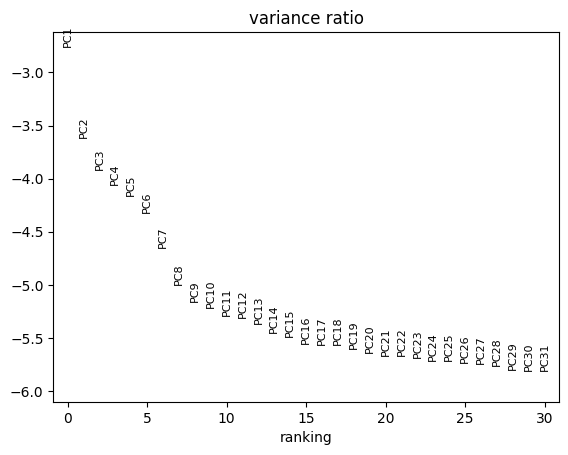

In [23]:
# Contribution of single PCs to the total variance in the data
# This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function  `sc.tl.louvain()` or tSNE `sc.tl.tsne()`
sc.pl.pca_variance_ratio(adata_nuclei, log=True)

In [24]:
adata_nuclei

AnnData object with n_obs × n_vars = 574869 × 380
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts'
    var: 'mean', 'std'
    uns: 'sopa_attrs', 'spatialdata_attrs', 'log1p', 'pca'
    obsm: 'spatial', 'tangram_pred', 'X_pca'
    varm: 'PCs'

In [25]:
# Group the PCs into a single AnnData object
X_nuc_pca = adata_nuclei.obsm["X_pca"][:, :16]

# As in MFA, divide the PCs by the square root of the maximal eigenvalue for each dataset separately
X_nuc_pca /= np.sqrt(np.max(adata_nuclei.uns["pca"]["variance"]))

# Save obs
nuclei_obs_all = adata_nuclei.obs.copy()

In [26]:
# Check var of first PC for each table is 1
print(np.var(adata_nuclei.obsm["X_pca"][:, 0]))

0.99999803


In [27]:
# Have a look to all the PCs var in the combined data
print("Nuc:")
for i in range(16):
    print(f"PC {i} variance: {np.var(adata_nuclei.obsm['X_pca'][:, i])}")

Nuc:
PC 0 variance: 0.9999980330467224
PC 1 variance: 0.42548510432243347
PC 2 variance: 0.3136693835258484
PC 3 variance: 0.2736895680427551
PC 4 variance: 0.2456102818250656
PC 5 variance: 0.20861399173736572
PC 6 variance: 0.15125897526741028
PC 7 variance: 0.10685714334249496
PC 8 variance: 0.0903797447681427
PC 9 variance: 0.08605065941810608
PC 10 variance: 0.07982731610536575
PC 11 variance: 0.07792645692825317
PC 12 variance: 0.07359455525875092
PC 13 variance: 0.06740899384021759
PC 14 variance: 0.06528908014297485
PC 15 variance: 0.06133067607879639


In [28]:
# Clean memory
del adata_nuclei
gc.collect()

5372

##### Cyto :

In [29]:
adata_cyto = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cyto_{slide_id}.h5ad")

In [30]:
# Preprocess the data
sc.pp.normalize_total(adata_cyto, target_sum=1e4)
sc.pp.log1p(adata_cyto)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [31]:
# Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata_cyto, max_value=10)

In [32]:
# Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
sc.tl.pca(adata_cyto, svd_solver="arpack", use_highly_variable=False)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:385: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


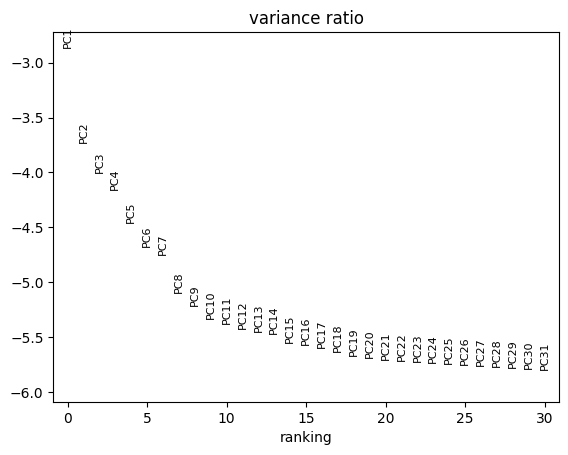

In [33]:
# Contribution of single PCs to the total variance in the data
# This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function  `sc.tl.louvain()` or tSNE `sc.tl.tsne()`
sc.pl.pca_variance_ratio(adata_cyto, log=True)

In [34]:
adata_cyto

AnnData object with n_obs × n_vars = 574869 × 380
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region'
    var: 'gene_ids', 'feature_types', 'genome', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [35]:
# Group the PCs into a single AnnData object
X_cyto_pca = adata_cyto.obsm["X_pca"][:, :16]

# As in MFA, divide the PCs by the square root of the maximal eigenvalue for each dataset separately
X_cyto_pca /= np.sqrt(np.max(adata_cyto.uns["pca"]["variance"]))

# Check that obs_names align
assert np.array_equal(nuclei_obs_all['cell_id'].values, adata_cyto.obs['cell_id'].values), "Cell IDs do not match"

# Concatenate along columns (features) and keep only informative PCs
X_combined = np.concatenate([X_nuc_pca, X_cyto_pca], axis=1)

# Create a new AnnData to store these fused PCs
adata_combined = ad.AnnData(X=X_combined, obs=nuclei_obs_all.copy())

# Name the columns
adata_combined.var_names = [f"PC_nuc_{i}" for i in range(len(X_nuc_pca[0]))] + [f"PC_cyto_{i}" for i in range(len(X_cyto_pca[0]))]

In [36]:
# Check var of first PC for each table is 1
print(np.var(adata_cyto.obsm["X_pca"][:, 0]))

0.9999983


In [37]:
# Have a look to all the PCs var in the combined data
print("Cyto:")
for i in range(16):
    print(f"PC {i} variance: {np.var(adata_cyto.obsm['X_pca'][:, i])}")

Cyto:
PC 0 variance: 0.9999982714653015
PC 1 variance: 0.41983523964881897
PC 2 variance: 0.3194938898086548
PC 3 variance: 0.2746407687664032
PC 4 variance: 0.20330007374286652
PC 5 variance: 0.1636461317539215
PC 6 variance: 0.15194061398506165
PC 7 variance: 0.10787642747163773
PC 8 variance: 0.09556905925273895
PC 9 variance: 0.0849701315164566
PC 10 variance: 0.0808728039264679
PC 11 variance: 0.07746408134698868
PC 12 variance: 0.07560115307569504
PC 13 variance: 0.0739784836769104
PC 14 variance: 0.06841728091239929
PC 15 variance: 0.06719941645860672


In [38]:
# Clean memory
del adata_cyto
gc.collect()

5317

In [39]:
# Add final labels coming from table nuclei and table cells

adata_combined.obs['transcript_cat'] = adata_combined.obs['cell_id'].map(cellid2transcript_cat).fillna('Unknown')

adata_combined.obs['final_label_nuclei'] = adata_combined.obs['cell_id'].map(cellid2nucleilabel).fillna('Unknown')
adata_combined.obs['final_label_cells'] = adata_combined.obs['cell_id'].map(cellid2celllabel).fillna('Unknown')

adata_combined.obs['label1_nuclei'] = adata_combined.obs['cell_id'].map(cellid2nucleilabel1).fillna('Unknown')
adata_combined.obs['label1_cells'] = adata_combined.obs['cell_id'].map(cellid2celllabel1).fillna('Unknown')

adata_combined.obs

region   slide     cell_id       area  \
aaaaaaaa-1  nucleus_boundaries  morpho  aaaaaaaa-1  39.195546   
aaaaaaab-1  nucleus_boundaries  morpho  aaaaaaab-1  35.628433   
aaaaaaac-1  nucleus_boundaries  morpho  aaaaaaac-1  27.475306   
aaaaaaad-1  nucleus_boundaries  morpho  aaaaaaad-1  20.115325   
aaaaaaae-1  nucleus_boundaries  morpho  aaaaaaae-1  41.472044   
...                        ...     ...         ...        ...   
aaaimnlo-1  nucleus_boundaries  morpho  aaaimnlo-1  30.208380   
aaaimnlp-1  nucleus_boundaries  morpho  aaaimnlp-1  31.361348   
aaaimnma-1  nucleus_boundaries  morpho  aaaimnma-1  55.811864   
aaaimnmb-1  nucleus_boundaries  morpho  aaaimnmb-1  12.621063   
aaaimnmc-1  nucleus_boundaries  morpho  aaaimnmc-1   8.602764   

                                    ct_tangram  transcript_counts  \
aaaaaaaa-1                           Mast cell                 13   
aaaaaaab-1                                 ILC                 25   
aaaaaaac-1                    CXCL+ fibroblast                 73   
aaaaaaad-1           CXCL14 mammary basal cell                 50   
aaaaaaae-1                        Capillary EC                143   
...                                        ...                ...   
aaaimnlo-1         Vascular smooth muscle cell                 75   
aaaimnlp-1  Secretoglobin mammary luminal cell                 87   
aaaimnma-1      SFN mammary luminal progenitor                158   
aaaimnmb-1                           Mast cell                 28   
aaaimnmc-1         Vascular smooth muscle cell                 15   

            transcript_cat        final_label_nuclei final_label_cells  \
aaaaaaaa-1               1                Epithelial        Epithelial   
aaaaaaab-1               2                Epithelial        Epithelial   
aaaaaaac-1               5  Fibroblast_Myofibroblast      Blood_vessel   
aaaaaaad-1               4                Epithelial        Epithelial   
aaaaaaae-1               5                Epithelial        Epithelial   
...                    ...                       ...               ...   
aaaimnlo-1               2                Epithelial        Epithelial   
aaaimnlp-1               2                Epithelial        Epithelial   
aaaimnma-1               5                Epithelial        Epithelial   
aaaimnmb-1               0                Epithelial        Epithelial   
aaaimnmc-1               0                Epithelial           Myeloid   

           label1_nuclei         label1_cells  
aaaaaaaa-1    Epithelial           Epithelial  
aaaaaaab-1    Epithelial           Epithelial  
aaaaaaac-1    Fibroblast         Blood_vessel  
aaaaaaad-1    Epithelial           Epithelial  
aaaaaaae-1    Epithelial           Epithelial  
...                  ...                  ...  
aaaimnlo-1    Epithelial           Epithelial  
aaaimnlp-1    Epithelial           Epithelial  
aaaimnma-1    Epithelial           Epithelial  
aaaimnmb-1    Epithelial           Epithelial  
aaaimnmc-1    Epithelial  Monocyte/Macrophage  

[574869 rows x 11 columns]

In [40]:
adata_combined

AnnData object with n_obs × n_vars = 574869 × 32
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'

In [41]:
adata_combined.var

Empty DataFrame
Columns: []
Index: [PC_nuc_0, PC_nuc_1, PC_nuc_2, PC_nuc_3, PC_nuc_4, PC_nuc_5, PC_nuc_6, PC_nuc_7, PC_nuc_8, PC_nuc_9, PC_nuc_10, PC_nuc_11, PC_nuc_12, PC_nuc_13, PC_nuc_14, PC_nuc_15, PC_cyto_0, PC_cyto_1, PC_cyto_2, PC_cyto_3, PC_cyto_4, PC_cyto_5, PC_cyto_6, PC_cyto_7, PC_cyto_8, PC_cyto_9, PC_cyto_10, PC_cyto_11, PC_cyto_12, PC_cyto_13, PC_cyto_14, PC_cyto_15]

## 4. PCA on the two separated PCA (late fusion) + Clustering

In [42]:
# Run a "second PCA" on the scaled features
# No scaling because we already scaled using the maximum eigenvalue for each table
sc.tl.pca(adata_combined)

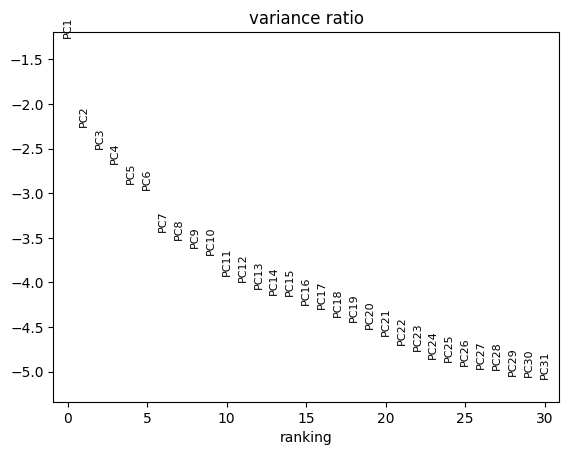

In [43]:
sc.pl.pca_variance_ratio(adata_combined, log=True)

In [44]:
adata_combined

AnnData object with n_obs × n_vars = 574869 × 32
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [45]:
# Neighborhood graph of cells using the PCA representation of the data matrix
sc.pp.neighbors(adata_combined, n_neighbors=10, n_pcs=29, use_rep="X_pca", key_added='pca_n10_pcs29')
# Embedding the neighborhood graph using UMAP
sc.tl.umap(adata_combined, neighbors_key='pca_n10_pcs29')
# Leiden clustering directly clusters the neighborhood graph of cells
sc.tl.leiden(adata_combined, resolution=0.4, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs29_leiden_res0.4', neighbors_key='pca_n10_pcs29')
sc.tl.leiden(adata_combined, resolution=0.6, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs29_leiden_res0.6', neighbors_key='pca_n10_pcs29')
sc.tl.leiden(adata_combined, resolution=0.8, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs29_leiden_res0.8', neighbors_key='pca_n10_pcs29')

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_45745/852845240.py:6: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_combined, resolution=0.4, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs29_leiden_res0.4', neighbors_key='pca_n10_pcs29')


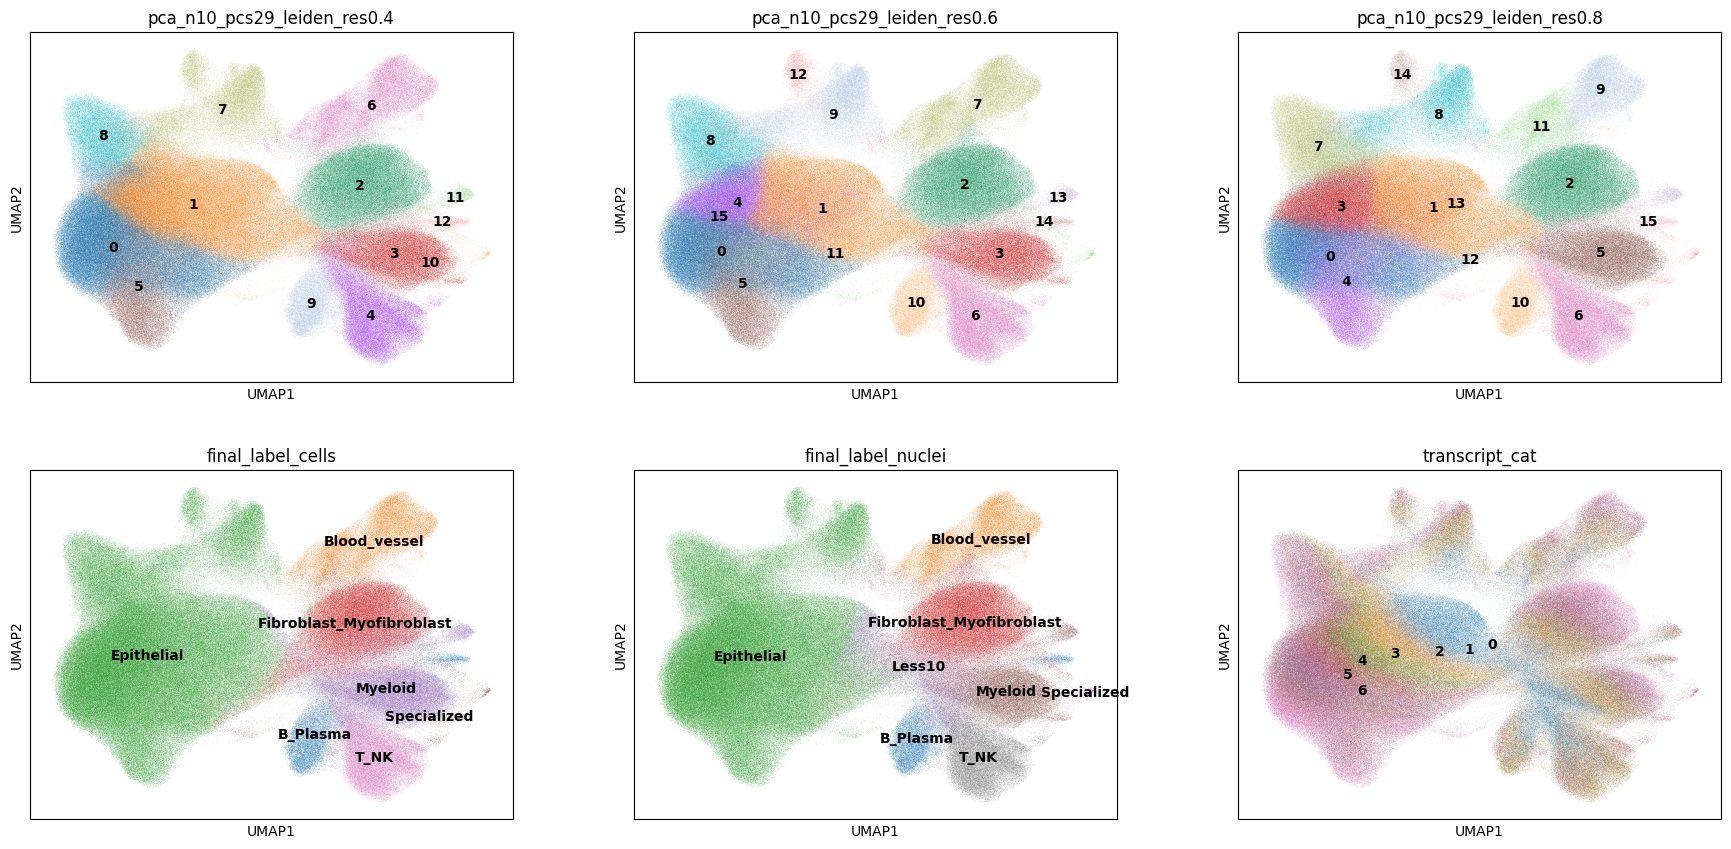

In [46]:
# Plot the clusters
adata_combined.obs['transcript_cat'] = pd.Categorical(adata_combined.obs['transcript_cat'])
sc.pl.umap(adata_combined, neighbors_key='pca_n10_pcs29',
           color=['pca_n10_pcs29_leiden_res0.4', 'pca_n10_pcs29_leiden_res0.6', 'pca_n10_pcs29_leiden_res0.8', 'final_label_cells', 'final_label_nuclei', 'transcript_cat'],
           ncols=3, legend_loc='on data')

In [47]:
clustering_label = 'pca_n10_pcs29_leiden_res0.6'

In [48]:
adata_cells = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cells_{slide_id}.h5ad")

In [49]:
# Put the clustering_label into the adata_cells to be able to use marker genes, and also final_label_cells and final_label_nuclei
cellid2clustering_label = dict(adata_combined.obs[['cell_id', clustering_label]].values)
adata_cells.obs["cluster_combined"] = adata_cells.obs['cell_id'].map(cellid2clustering_label).fillna('Unknown')
adata_cells.obs["final_label_cells"] = adata_cells.obs['cell_id'].map(cellid2celllabel).fillna('Unknown')
adata_cells.obs["final_label_nuclei"] = adata_cells.obs['cell_id'].map(cellid2nucleilabel).fillna('Unknown')


# Preprocess the adata_cells
sc.pp.normalize_total(adata_cells, target_sum=1e4)
sc.pp.log1p(adata_cells)

# Add X_umap to adata_cells, checking before cell_id alignment
assert np.array_equal(adata_cells.obs['cell_id'].values, adata_combined.obs['cell_id'].values), "Cell IDs do not match"
adata_cells.obsm['X_umap'] = adata_combined.obsm['X_umap']

# Wilcoxon rank-sum (Mann-Whitney-U) test. 
# You might also consider much more powerful differential testing packages like MAST, limma, DESeq2 and, for python, the recent diffxpy.
sc.tl.rank_genes_groups(adata_cells, "cluster_combined", method="wilcoxon", corr_method="benjamini-hochberg", key_added="rank_genes_"+"cluster_combined")
# The top ranked genes per cluster
top_ranked_genes = pd.DataFrame(adata_cells.uns["rank_genes_"+"cluster_combined"]["names"]).iloc[:7, :]
list_genes = pd.concat([top_ranked_genes[col] for col in top_ranked_genes], ignore_index=True).tolist()

## 5. Analyze and get combined labels

### Helper functions

In [50]:
def analyze_clusters(adata, resolution_key):
    
    # Ensure the resolution key exists in obs
    if resolution_key not in adata.obs:
        raise ValueError(f"{resolution_key} not found in adata.obs.")
    
    # Group data by the specified clustering resolution
    cluster_groups = adata.obs.groupby(resolution_key)

    results = {}

    for cluster_id, group in cluster_groups:
        
        # Calculate dominant labels for final_label_cells
        label_cells_counts = group['final_label_cells'].value_counts(normalize=True)
        dominant_cells = label_cells_counts.head(2) * 100  # Get top 2 labels as percentages

        # Calculate top1 for label1 for cells
        label1_cells_counts = group['label1_cells'].value_counts(normalize=True)
        top1_cells = label1_cells_counts.head(1) * 100

        # Calculate dominant labels for final_label_nuclei
        label_nuclei_counts = group['final_label_nuclei'].value_counts(normalize=True)
        dominant_nuclei = label_nuclei_counts.head(2) * 100  # Get top 2 labels as percentages

        # Calculate top1 for label1 for nuclei
        label1_nuclei_counts = group['label1_nuclei'].value_counts(normalize=True)
        top1_nuclei = label1_nuclei_counts.head(1) * 100
        if top1_nuclei.keys()[0] == 'less_10_rna':
            top1_nuclei = label1_nuclei_counts.head(2).tail(1) * 100
        
        # Align categories for comparison
        common_categories = group['final_label_cells'].cat.categories.union(group['final_label_nuclei'].cat.categories)
        group['final_label_cells'] = group['final_label_cells'].cat.set_categories(common_categories)
        group['final_label_nuclei'] = group['final_label_nuclei'].cat.set_categories(common_categories)

        # Count different labels between final_label_cells and final_label_nuclei
        total_cells = len(group)  # Total number of cells in the cluster
        differing_labels_count_woUnknown = ((group['final_label_cells'] != group['final_label_nuclei']) & (group['final_label_nuclei'] != 'Unknown')  & (group['final_label_nuclei'] != 'Less10')).sum() / total_cells * 100
        differing_labels_count = (group['final_label_cells'] != group['final_label_nuclei']).sum() / total_cells * 100

        # Store the results
        results[cluster_id] = (dominant_cells.to_dict(), dominant_nuclei.to_dict(), top1_cells.to_dict(), top1_nuclei.to_dict(), differing_labels_count_woUnknown, differing_labels_count)

    return results

In [51]:
def analyze_cluster_dominance(cluster_analysis_results):
    
    clusters_unknown_cells = []
    clusters_different_top1 = []
    clusters_high_diff = []

    for cluster_id, (dominant_cells, dominant_nuclei, label1_cells, label1_nuclei, diff_percentage_woUnknown, _) in cluster_analysis_results.items():
        
        # Check if top 1 dominant_cells is 'Unknown' or 'Less10'
        
        top1_dominant_cells = max(dominant_cells, key=dominant_cells.get)
        if top1_dominant_cells == 'Unknown' or top1_dominant_cells == 'Less10':
            clusters_unknown_cells.append(cluster_id)
        
        # Check if top 1 for dominant_cells is different from dominant_nuclei
        
        top1_dominant_nuclei = max(dominant_nuclei, key=dominant_nuclei.get)

        if top1_dominant_nuclei == 'Unknown' or top1_dominant_nuclei == 'Less10':
            sorted_nuclei = sorted(dominant_nuclei.items(), key=lambda x: x[1], reverse=True)
            if len(sorted_nuclei) > 1:  # Make sure there's a second element
                top1_dominant_nuclei = sorted_nuclei[1][0]

        if top1_dominant_cells != top1_dominant_nuclei:
            clusters_different_top1.append(cluster_id)
        
        # Check if diff_percentage_woUnknown is greater than 40%
        
        if diff_percentage_woUnknown > 40:
            clusters_high_diff.append(cluster_id)

    print(f"Clusters where the top 1 for dominant_cells is 'Unknown' or 'Less10': {clusters_unknown_cells}")
    print(f"Clusters where the top 1 for dominant_cells differs from dominant_nuclei (excluding 'Unknown' and 'Less10'): {clusters_different_top1}")
    print(f"Clusters where diff_percentage_woUnknown is greater than 40%: {clusters_high_diff}")

    print("=" * 50)

    clusters_to_analyse = set(clusters_unknown_cells + clusters_different_top1 + clusters_high_diff)
    for cluster_id in clusters_to_analyse:
        print(f"\nCluster ID: {cluster_id}")
        print(f"Dominant final_label_cells: {cluster_analysis_results[cluster_id][0]} - with dominant label1: {cluster_analysis_results[cluster_id][2]}")
        print(f"Dominant final_label_nuclei: {cluster_analysis_results[cluster_id][1]} - with dominant label1: {cluster_analysis_results[cluster_id][3]}")
        print(f"Count of differing labels without 'Unknown' or 'Less10' label for Nuclei: {round(cluster_analysis_results[cluster_id][4], 2)} %")
        print(f"Count of differing labels: {round(cluster_analysis_results[cluster_id][5], 2)} %")
        print(f"% of cells in cluster: {round(len(adata_combined.obs[adata_combined.obs[clustering_label] == cluster_id]) / len(adata_combined.obs) * 100, 2)} %")
        print("-----")

In [52]:
def assign_final_labels(cluster_analysis_results, input_dict):
    
    dict_combined_labels = {}

    for cluster_id, (dominant_cells, _, _, _, _, _) in cluster_analysis_results.items():
        
        if cluster_id in input_dict:
            # Use the label from input_dict if cluster_id is in it
            dict_combined_labels[cluster_id] = input_dict[cluster_id]
        else:
            # Otherwise, use the dominant label from final_label_cells
            dict_combined_labels[cluster_id] = max(dominant_cells, key=dominant_cells.get)

    return dict_combined_labels

### Analysis

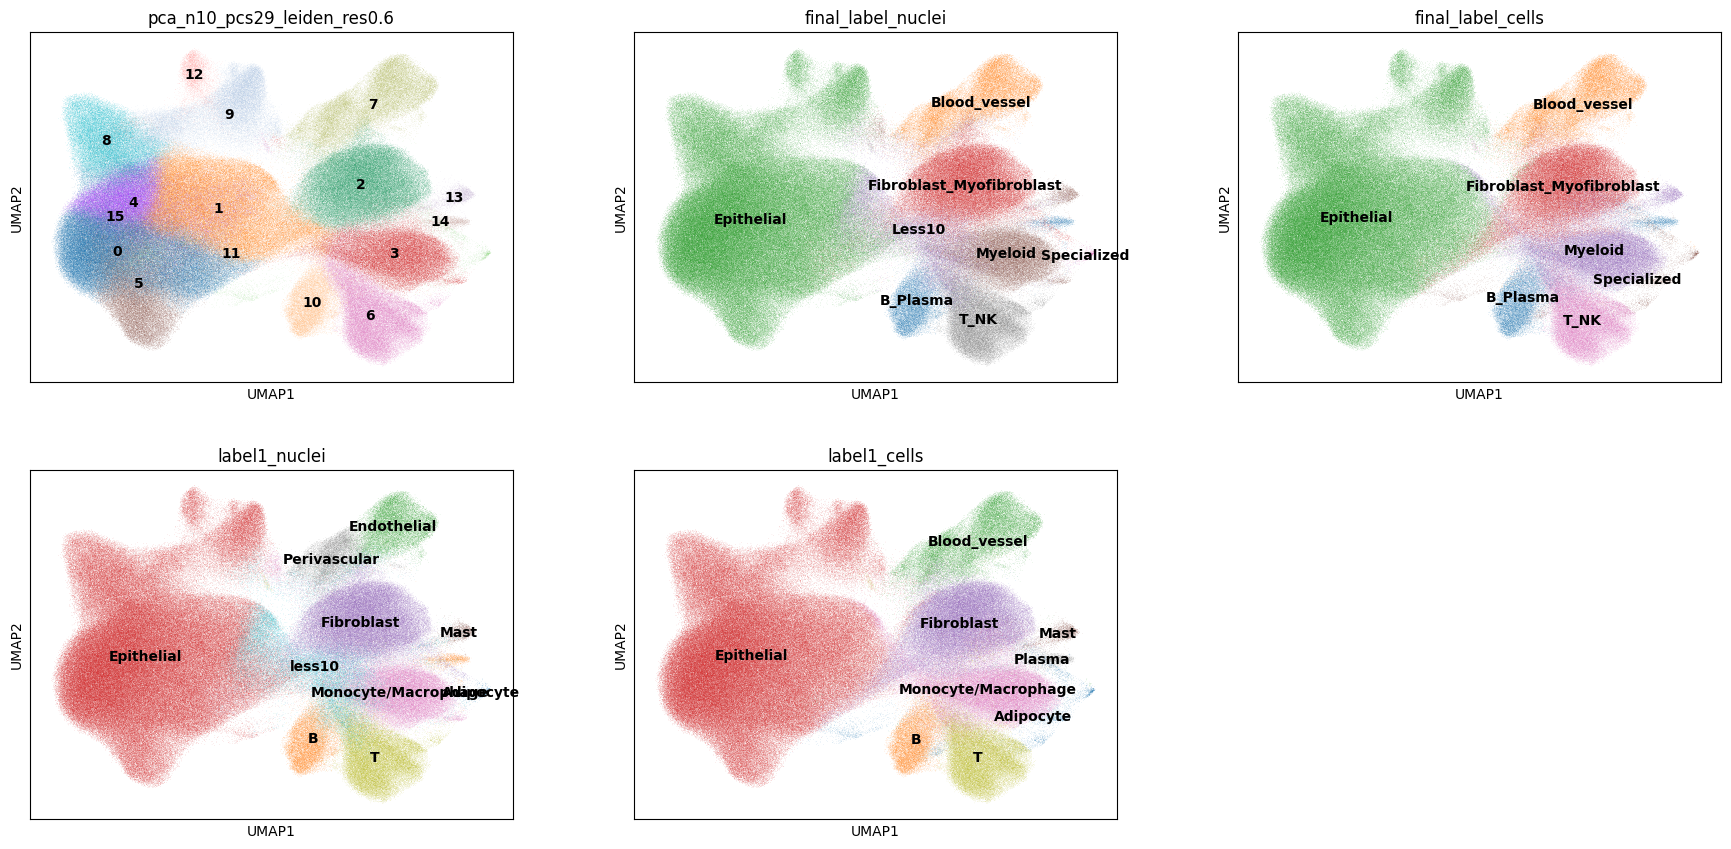

In [53]:
# Plot the clusters
sc.pl.umap(adata_combined, neighbors_key='pca_n10_pcs29',
           color=[clustering_label, 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'],
           ncols=3, legend_loc='on data')

In [54]:
cluster_analysis_results = analyze_clusters(adata_combined, clustering_label)

for cluster_id, (dominant_cells, dominant_nuclei, _, _, diff_count_woUnknown, diff_count) in cluster_analysis_results.items():
    print("=" * 50)
    print(f"Cluster ID: {cluster_id}")
    print(f"Dominant final_label_cells: {dominant_cells}")
    print(f"Dominant final_label_nuclei: {dominant_nuclei}")
    print(f"Count of differing labels without 'Unknown/Less10' label for Nuclei: {round(diff_count_woUnknown, 2)} %")
    print(f"Count of differing labels: {round(diff_count, 2)} %\n")

Cluster ID: 0
Dominant final_label_cells: {'Epithelial': 98.83009763214005, 'Fibroblast_Myofibroblast': 0.9351737552837316}
Dominant final_label_nuclei: {'Epithelial': 99.28459207720795, 'Fibroblast_Myofibroblast': 0.6714547562937194}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 1.54 %
Count of differing labels: 1.55 %

Cluster ID: 1
Dominant final_label_cells: {'Epithelial': 87.19602262492344, 'Fibroblast_Myofibroblast': 6.543694683623351}
Dominant final_label_nuclei: {'Epithelial': 78.90502095567484, 'Less10': 17.662811783213844}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 5.77 %
Count of differing labels: 23.43 %

Cluster ID: 2
Dominant final_label_cells: {'Fibroblast_Myofibroblast': 88.96530298109104, 'Myeloid': 6.349116687613857}
Dominant final_label_nuclei: {'Fibroblast_Myofibroblast': 95.00939093104374, 'Less10': 3.360964794599862}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 11.56 %
Count of differing labe

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_45745/1125182952.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_groups = adata.obs.groupby(resolution_key)


In [55]:
analyze_cluster_dominance(cluster_analysis_results)

Clusters where the top 1 for dominant_cells is 'Unknown' or 'Less10': []
Clusters where the top 1 for dominant_cells differs from dominant_nuclei (excluding 'Unknown' and 'Less10'): ['11']
Clusters where diff_percentage_woUnknown is greater than 40%: []

Cluster ID: 11
Dominant final_label_cells: {'Specialized': 48.34756776828815, 'Epithelial': 47.827701448199036} - with dominant label1: {'Adipocyte': 48.34756776828815}
Dominant final_label_nuclei: {'Epithelial': 61.6784255477163, 'Fibroblast_Myofibroblast': 17.619754920163384} - with dominant label1: {'Epithelial': 61.6784255477163}
Count of differing labels without 'Unknown' or 'Less10' label for Nuclei: 33.42 %
Count of differing labels: 37.47 %
% of cells in cluster: 0.94 %
-----


0     PLIN1
1      G0S2
2    ADIPOQ
3     ADH1B
4      GPX3
5       LPL
6       SCD
Name: 11, dtype: object


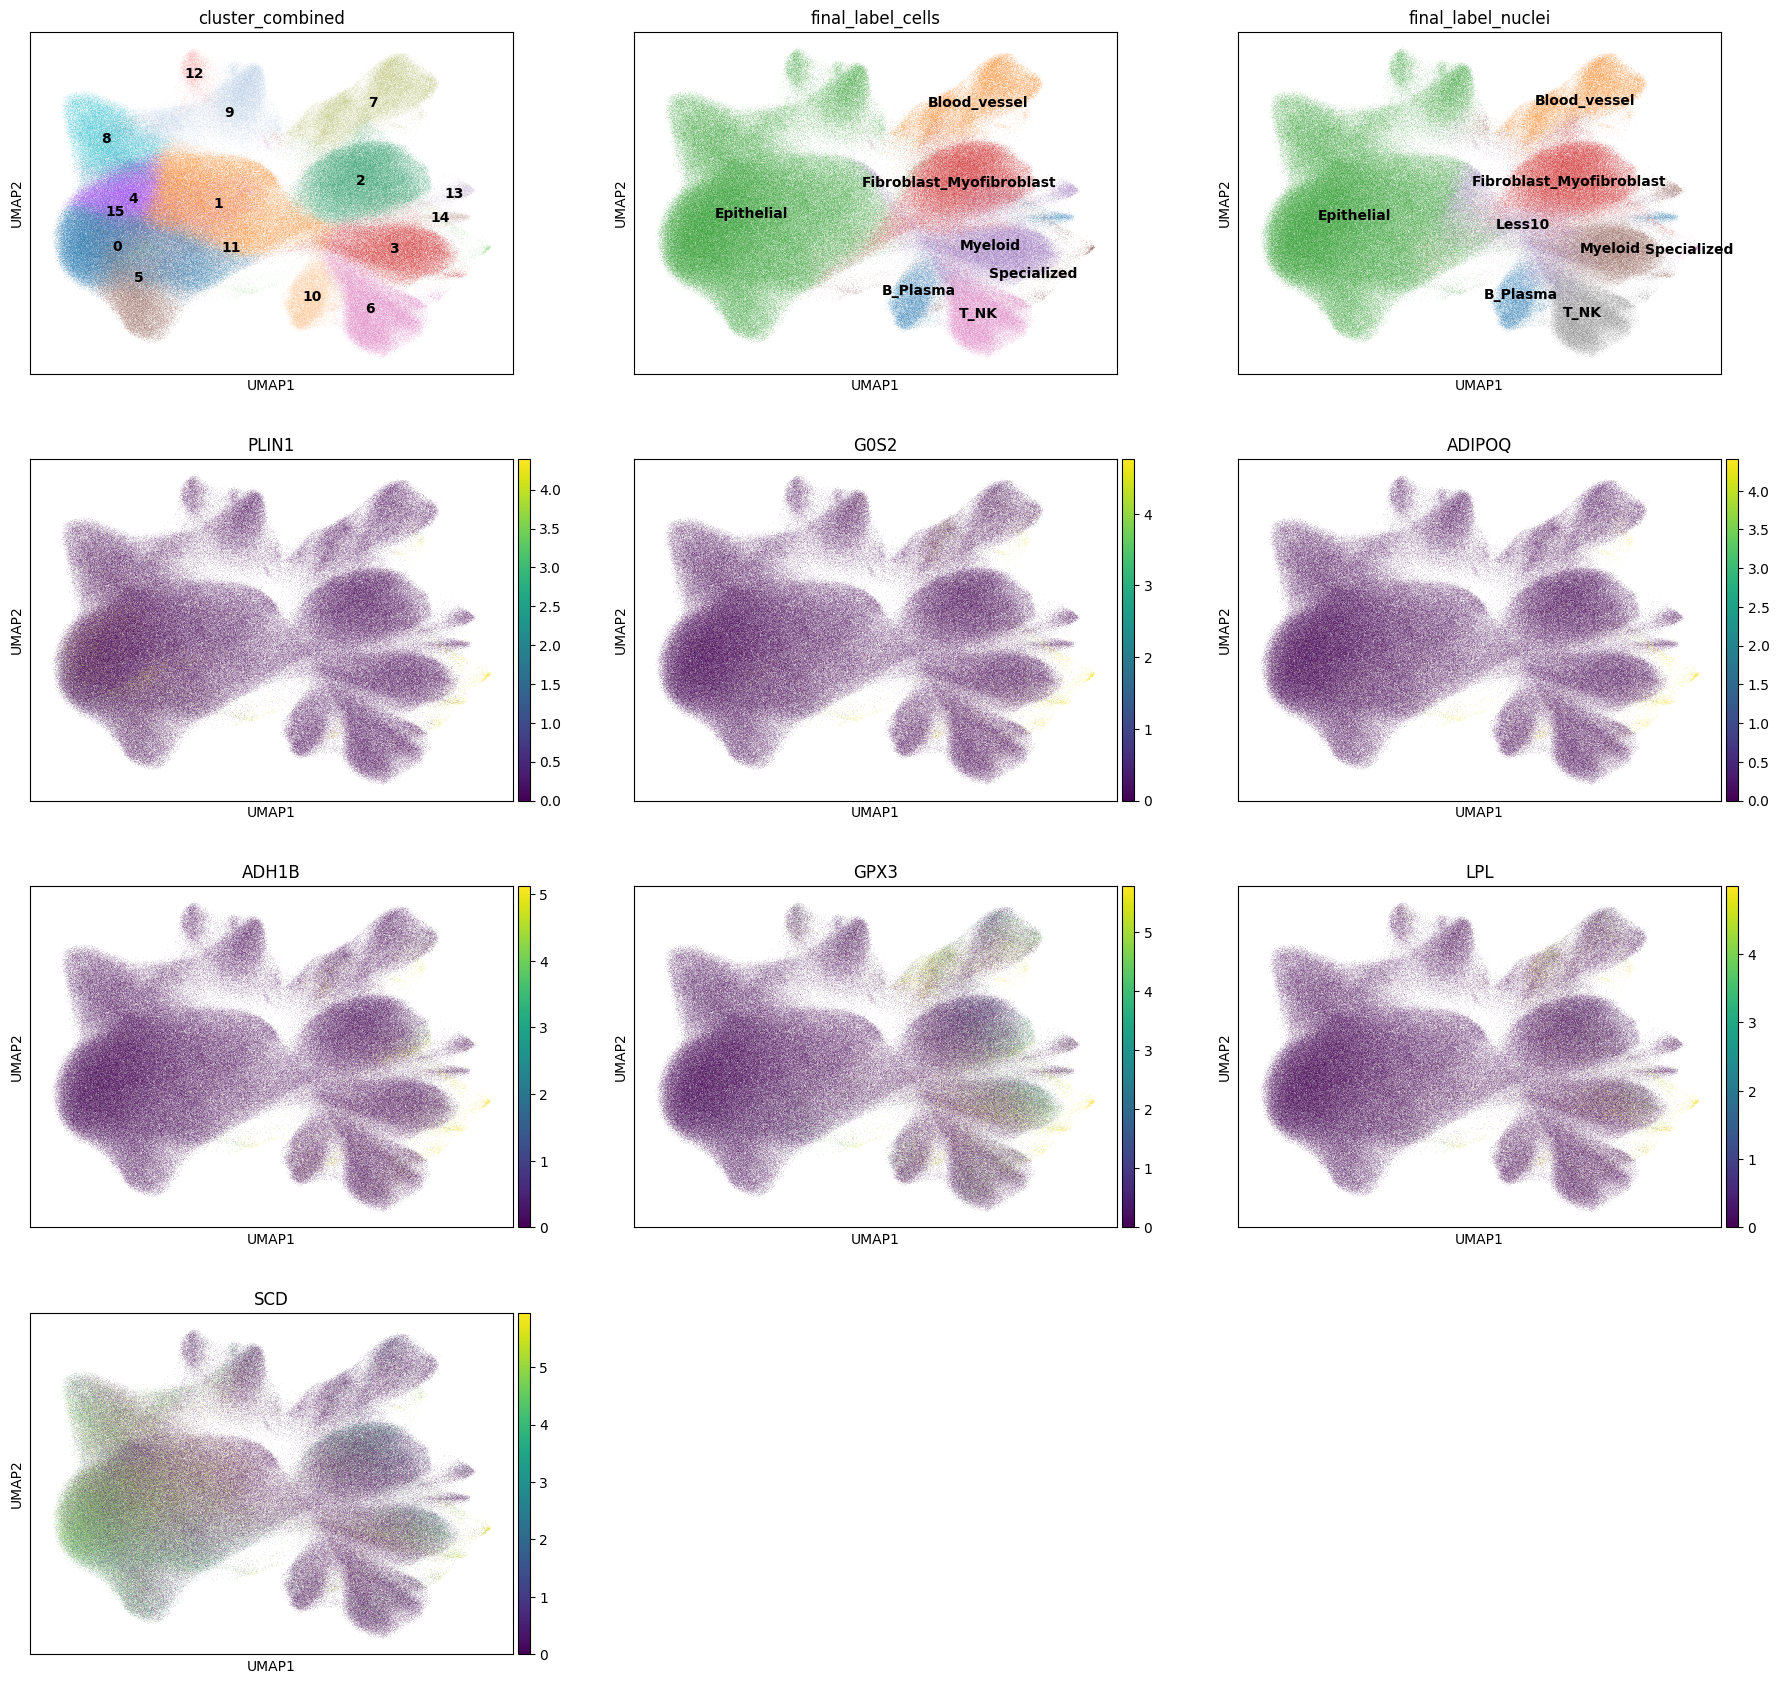

In [56]:
cluster_id = '11'
print(top_ranked_genes[cluster_id])
sc.pl.umap(adata_cells, color=["cluster_combined", 'final_label_cells', 'final_label_nuclei']+list_genes[int(cluster_id)*7:int(cluster_id)*7+7], vmax="p99", vmin=0, ncols=3, legend_loc='on data')

In [57]:
dict_combined_labels = assign_final_labels(cluster_analysis_results, {})
dict_combined_labels

{'0': 'Epithelial',
 '1': 'Epithelial',
 '2': 'Fibroblast_Myofibroblast',
 '3': 'Myeloid',
 '4': 'Epithelial',
 '5': 'Epithelial',
 '6': 'T_NK',
 '7': 'Blood_vessel',
 '8': 'Epithelial',
 '9': 'Epithelial',
 '10': 'B_Plasma',
 '11': 'Specialized',
 '12': 'Epithelial',
 '13': 'Myeloid',
 '14': 'B_Plasma',
 '15': 'Epithelial'}

In [58]:
adata_combined.obs['final_label_combined'] = adata_combined.obs[clustering_label].map(dict_combined_labels)
adata_combined.obs

region   slide     cell_id       area  \
aaaaaaaa-1  nucleus_boundaries  morpho  aaaaaaaa-1  39.195546   
aaaaaaab-1  nucleus_boundaries  morpho  aaaaaaab-1  35.628433   
aaaaaaac-1  nucleus_boundaries  morpho  aaaaaaac-1  27.475306   
aaaaaaad-1  nucleus_boundaries  morpho  aaaaaaad-1  20.115325   
aaaaaaae-1  nucleus_boundaries  morpho  aaaaaaae-1  41.472044   
...                        ...     ...         ...        ...   
aaaimnlo-1  nucleus_boundaries  morpho  aaaimnlo-1  30.208380   
aaaimnlp-1  nucleus_boundaries  morpho  aaaimnlp-1  31.361348   
aaaimnma-1  nucleus_boundaries  morpho  aaaimnma-1  55.811864   
aaaimnmb-1  nucleus_boundaries  morpho  aaaimnmb-1  12.621063   
aaaimnmc-1  nucleus_boundaries  morpho  aaaimnmc-1   8.602764   

                                    ct_tangram  transcript_counts  \
aaaaaaaa-1                           Mast cell                 13   
aaaaaaab-1                                 ILC                 25   
aaaaaaac-1                    CXCL+ fibroblast                 73   
aaaaaaad-1           CXCL14 mammary basal cell                 50   
aaaaaaae-1                        Capillary EC                143   
...                                        ...                ...   
aaaimnlo-1         Vascular smooth muscle cell                 75   
aaaimnlp-1  Secretoglobin mammary luminal cell                 87   
aaaimnma-1      SFN mammary luminal progenitor                158   
aaaimnmb-1                           Mast cell                 28   
aaaimnmc-1         Vascular smooth muscle cell                 15   

           transcript_cat        final_label_nuclei final_label_cells  \
aaaaaaaa-1              1                Epithelial        Epithelial   
aaaaaaab-1              2                Epithelial        Epithelial   
aaaaaaac-1              5  Fibroblast_Myofibroblast      Blood_vessel   
aaaaaaad-1              4                Epithelial        Epithelial   
aaaaaaae-1              5                Epithelial        Epithelial   
...                   ...                       ...               ...   
aaaimnlo-1              2                Epithelial        Epithelial   
aaaimnlp-1              2                Epithelial        Epithelial   
aaaimnma-1              5                Epithelial        Epithelial   
aaaimnmb-1              0                Epithelial        Epithelial   
aaaimnmc-1              0                Epithelial           Myeloid   

           label1_nuclei         label1_cells pca_n10_pcs29_leiden_res0.4  \
aaaaaaaa-1    Epithelial           Epithelial                           1   
aaaaaaab-1    Epithelial           Epithelial                           1   
aaaaaaac-1    Fibroblast         Blood_vessel                           2   
aaaaaaad-1    Epithelial           Epithelial                           0   
aaaaaaae-1    Epithelial           Epithelial                           0   
...                  ...                  ...                         ...   
aaaimnlo-1    Epithelial           Epithelial                           1   
aaaimnlp-1    Epithelial           Epithelial                           1   
aaaimnma-1    Epithelial           Epithelial                           0   
aaaimnmb-1    Epithelial           Epithelial                           1   
aaaimnmc-1    Epithelial  Monocyte/Macrophage                           1   

           pca_n10_pcs29_leiden_res0.6 pca_n10_pcs29_leiden_res0.8  \
aaaaaaaa-1                           4                           3   
aaaaaaab-1                           1                          13   
aaaaaaac-1                           2                          11   
aaaaaaad-1                           0                           0   
aaaaaaae-1                           0                           0   
...                                ...                         ...   
aaaimnlo-1                           4                           3   
aaaimnlp-1                           4              

In [59]:
adata_combined.obs['final_label_combined'].value_counts(dropna=False)

final_label_combined
Epithelial                  352820
Fibroblast_Myofibroblast     70813
Myeloid                      49142
T_NK                         42258
Blood_vessel                 34891
B_Plasma                     19559
Specialized                   5386
Name: count, dtype: int64

In [60]:
# Create final table, adding cell_id with less than 10 transcripts

adata_nuclei_ini = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_ini_{slide_id}.h5ad")

adata_combined_missing = adata_nuclei_ini[~adata_nuclei_ini.obs_names.isin(adata_combined.obs_names)].copy()
adata_combined_missing.obs['final_label_combined'] = 'Less10'
adata_combined_missing.obs['final_label_nuclei'] = 'Less10'
adata_combined_missing.obs['final_label_cells'] = 'Less10'
print(adata_combined.shape[0] + adata_combined_missing.shape[0])

adata_combined_all = ad.concat([adata_combined, adata_combined_missing], join="outer", merge="first", uns_merge="first", pairwise=True)
print(adata_combined_all.shape[0])

576963
576963


In [61]:
# Clean memory
del adata_combined, adata_combined_missing, adata_nuclei_ini
gc.collect()

98145

In [62]:
adata_combined_all

AnnData object with n_obs × n_vars = 576963 × 573
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells', 'pca_n10_pcs29_leiden_res0.4', 'pca_n10_pcs29_leiden_res0.6', 'pca_n10_pcs29_leiden_res0.8', 'final_label_combined'
    uns: 'pca', 'pca_n10_pcs29', 'umap', 'pca_n10_pcs29_leiden_res0.4', 'pca_n10_pcs29_leiden_res0.6', 'pca_n10_pcs29_leiden_res0.8', 'pca_n10_pcs29_leiden_res0.4_colors', 'pca_n10_pcs29_leiden_res0.6_colors', 'pca_n10_pcs29_leiden_res0.8_colors', 'final_label_cells_colors', 'final_label_nuclei_colors', 'transcript_cat_colors', 'label1_nuclei_colors', 'label1_cells_colors', 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'X_pca', 'X_umap', 'spatial', 'tangram_pred'
    varm: 'PCs'
    obsp: 'pca_n10_pcs29_distances', 'pca_n10_pcs29_connectivities'

In [63]:
adata_combined_all.obs['final_label_combined'].value_counts(dropna=False)

final_label_combined
Epithelial                  352820
Fibroblast_Myofibroblast     70813
Myeloid                      49142
T_NK                         42258
Blood_vessel                 34891
B_Plasma                     19559
Specialized                   5386
Less10                        2094
Name: count, dtype: int64

In [64]:
sdata_final = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('shapes',))

In [65]:
# Add in sdata final
sdata_final.tables['table_combined'] = adata_combined_all

In [66]:
adata_combined_all

AnnData object with n_obs × n_vars = 576963 × 573
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells', 'pca_n10_pcs29_leiden_res0.4', 'pca_n10_pcs29_leiden_res0.6', 'pca_n10_pcs29_leiden_res0.8', 'final_label_combined'
    uns: 'pca', 'pca_n10_pcs29', 'umap', 'pca_n10_pcs29_leiden_res0.4', 'pca_n10_pcs29_leiden_res0.6', 'pca_n10_pcs29_leiden_res0.8', 'pca_n10_pcs29_leiden_res0.4_colors', 'pca_n10_pcs29_leiden_res0.6_colors', 'pca_n10_pcs29_leiden_res0.8_colors', 'final_label_cells_colors', 'final_label_nuclei_colors', 'transcript_cat_colors', 'label1_nuclei_colors', 'label1_cells_colors', 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'X_pca', 'X_umap', 'spatial', 'tangram_pred'
    varm: 'PCs'
    obsp: 'pca_n10_pcs29_distances', 'pca_n10_pcs29_connectivities'

In [67]:
# Convert in str the final_label_combined, final_label_cells and final_label_nuclei to see it in Napari
sdata_final.tables['table_combined'].obs['final_label_combined'] = sdata_final.tables['table_combined'].obs['final_label_combined'].astype(str)
sdata_final.tables['table_combined'].obs['final_label_cells'] = sdata_final.tables['table_combined'].obs['final_label_cells'].astype(str)
sdata_final.tables['table_combined'].obs['final_label_nuclei'] = sdata_final.tables['table_combined'].obs['final_label_nuclei'].astype(str)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


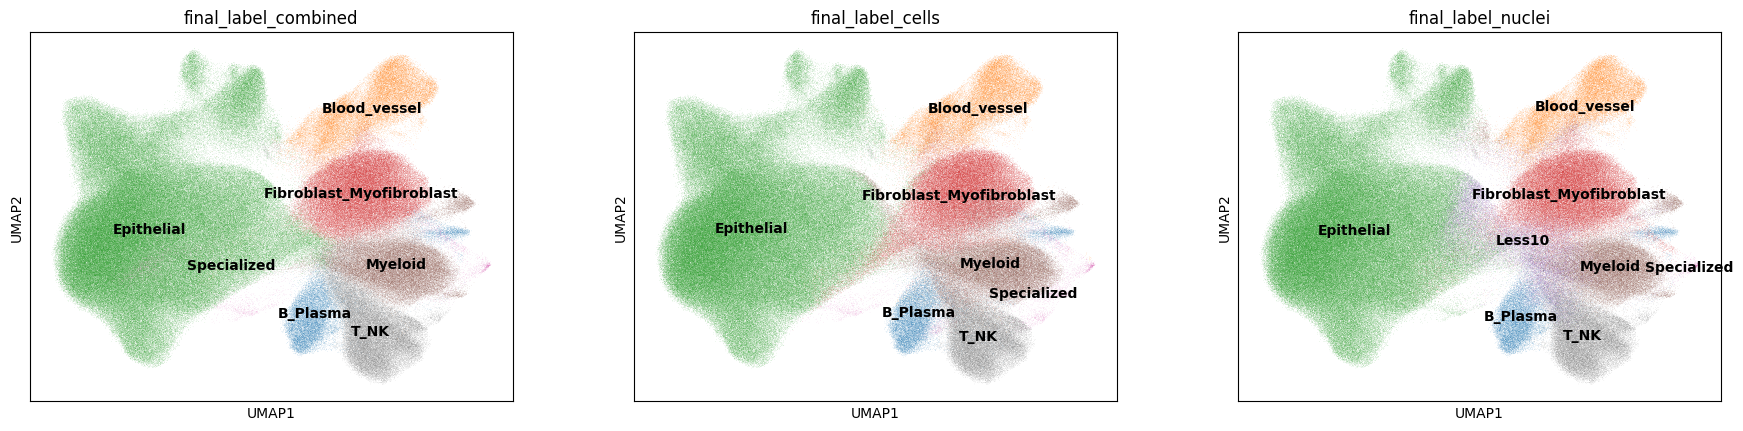

In [68]:
sc.pl.umap(sdata_final.tables['table_combined'], color=['final_label_combined', 'final_label_cells', 'final_label_nuclei'], ncols=3, legend_loc='on data')

In [69]:
# Put table_combined as annotating cell_boundaries

sdata_final["table_combined"].obs["region"] = "cell_boundaries"
sdata_final.tables["table_combined"].obs['region'] = sdata_final.tables["table_combined"].obs['region'].astype('category')
sdata_final.set_table_annotates_spatialelement(table_name="table_combined", region="cell_boundaries", region_key="region", instance_key="cell_id")

region, region_key, instance_key = get_table_keys(sdata_final["table_combined"])
print(region, region_key, instance_key)

cell_boundaries region cell_id


In [70]:
# Color for final label in Napari

to_hex = partial(colors.to_hex, keep_alpha=True)

# Normalize the RGB values to the range [0, 1] by dividing by 255
napari_color = {
                "T_NK": to_hex(to_rgba([255/255, 15/255, 15/255])[:3]),                      # Red
                "B_Plasma": to_hex(to_rgba([255/255, 143/255, 15/255])[:3]),                 # Orange
                "Myeloid": to_hex(to_rgba([255/255, 211/255, 15/255])[:3]),                  # Yellow
                "Blood_vessel": to_hex(to_rgba([70/255, 128/255, 0/255])[:3]),               # Dark Green
                "Fibroblast_Myofibroblast": to_hex(to_rgba([156/255, 255/255, 36/255])[:3]), # Light Green
                "Epithelial": to_hex(to_rgba([57/255, 208/255, 133/255])[:3]),               # Blue Green
                "Specialized": to_hex(to_rgba([69/255, 237/255, 255/255])[:3]),              # Turquoise
                "Melanocyte": to_hex(to_rgba([22/255, 169/255, 223/255])[:3]),               # Blue
                "Stem_like": to_hex(to_rgba([22/255, 69/255, 223/255])[:3]),                 # Dark Blue
                "Glioblastoma": to_hex(to_rgba([130/255, 55/255, 235/255])[:3]),             # Purple
                "Unknown": to_hex(to_rgba([0/255, 0/255, 0/255])[:3]),                       # Black
                "Less10": to_hex(to_rgba([143/255, 143/255, 143/255])[:3])                   # Grey
                }

sdata_final.tables['table_combined'].uns["final_label_combined_colors"] = napari_color
sdata_final.tables['table_combined'].uns["final_label_cells_colors"] = napari_color
sdata_final.tables['table_combined'].uns["final_label_nuclei_colors"] = napari_color

In [71]:
sdata_final.write_element("table_combined")